In [1]:
import pandas as pd

text = ['This is. the NLP TASKS ARTICLE written by ABhishek Jaiswal**', 'IN this article I"ll be explaining various DATA-CLEANING techniques',
 'So stay tuned for FURther More &&', 'Nah I don"t think he goes to usf, he lives around']

df = pd.DataFrame({'text':text})
df

,text
0,This is. the NLP TASKS ARTICLE written by ABhi...
1,"IN this article I""ll be explaining various DAT..."
2,So stay tuned for FURther More &&
3,"Nah I don""t think he goes to usf, he lives around"


In [2]:
df['lower'] = df['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
df

,text,lower
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


## Punctuation Removal 
Removing punctuation(*,&,%#@#()) is a crucial step since punctuation doesn’t add any extra information or value to our data.

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
df['preprocessed'] = df.lower.apply(lambda x: "".join(i for i in x if i not in string.punctuation))
df

,text,lower,preprocessed
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around


## Stop Words Removal
Words that frequently occur in sentences and carry no significant meaning in sentences. These are not important for prediction, so we remove stopwords to reduce data size and prevent overfitting. Note: Before filtering stopwords, make sure you lowercase the data since our stopwords are lowercase.

In [5]:
import nltk 
# nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df['stopword_removed'] = df.preprocessed.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df

,text,lower,preprocessed,stopword_removed
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around


## Spelling Correction

Most of the text data extracted in customer reviews, blogs, or tweets have some chances of spelling mistakes. Correcting spelling mistakes improves model accuracy.

In [6]:
# !pip install textblob

In [7]:
from textblob import TextBlob

df['correct'] = df.stopword_removed.apply(lambda x: str(TextBlob(x).correct()))
df

,text,lower,preprocessed,stopword_removed,correct
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...,article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around,ah dont think goes us lives around


## Tokenization
Tokenization means splitting text into meaningful unit words.

In [8]:
import nltk
# nltk.download('punkt')

df['tokens'] = df.correct.apply(lambda x: nltk.word_tokenize(x))
df

,text,lower,preprocessed,stopword_removed,correct,tokens
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]"
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...,article ill explaining various datacleaning te...,"[article, ill, explaining, various, datacleani..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]"
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around,ah dont think goes us lives around,"[ah, dont, think, goes, us, lives, around]"


## Stemming

Stemming is converting words into their root word.

    “fish,” “fishes,” and “fishing” are stemmed into “fish”.
    “playing”, “played”,” plays” are stemmed into “play”.
Stemming helps to reduce the vocabulary hence improving the accuracy.

In [9]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

df['Stemming'] = df.tokens.apply(lambda x: [st.stem(word) for word in x])
df

,text,lower,preprocessed,stopword_removed,correct,tokens,Stemming
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]","[nap, task, articl, written, abhishek, jaiswal]"
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...,article ill explaining various datacleaning te...,"[article, ill, explaining, various, datacleani...","[articl, ill, explain, variou, dataclean, tech..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]","[stay, tune]"
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around,ah dont think goes us lives around,"[ah, dont, think, goes, us, lives, around]","[ah, dont, think, goe, us, live, around]"


## Lemmatization

Lemmatization is converting words into their root word using vocabulary mapping. Lemmatization is done with the help of part of speech and its meaning.

    “good,” “better,” or “best” is lemmatized into “good“.
Lemmatization will convert all synonyms into a single root word. 

    “automobile“, “car“,” truck“,” vehicles” are lemmatized into “automobile”.

Lemmatization usually gets better results.

    leaves stemmed to leav while leafs , leaves lemmatized to leaf

But lemmatization is slower than stemming.


In [10]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

lm = WordNetLemmatizer()

df['lemmatizer'] = df.tokens.apply(lambda x: [lm.lemmatize(word) for word in x])
df

,text,lower,preprocessed,stopword_removed,correct,tokens,Stemming,lemmatizer
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]","[nap, task, articl, written, abhishek, jaiswal]","[nap, task, article, written, abhishek, jaiswal]"
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...,article ill explaining various datacleaning te...,"[article, ill, explaining, various, datacleani...","[articl, ill, explain, variou, dataclean, tech...","[article, ill, explaining, various, datacleani..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]","[stay, tune]","[stay, tuned]"
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around,ah dont think goes us lives around,"[ah, dont, think, goes, us, lives, around]","[ah, dont, think, goe, us, live, around]","[ah, dont, think, go, u, life, around]"


## Word Frequency
Counting the unique words in our data gives an idea about our data’s most frequent, least frequent terms

In [11]:
df['word_count'] = df.lemmatizer.apply(lambda x: nltk.FreqDist(x))
df

,text,lower,preprocessed,stopword_removed,correct,tokens,Stemming,lemmatizer,word_count
0,This is. the NLP TASKS ARTICLE written by ABhi...,this is. the nlp tasks article written by abhi...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]","[nap, task, articl, written, abhishek, jaiswal]","[nap, task, article, written, abhishek, jaiswal]","{'nap': 1, 'task': 1, 'article': 1, 'written':..."
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,article ill explaining various datacleaning te...,article ill explaining various datacleaning te...,"[article, ill, explaining, various, datacleani...","[articl, ill, explain, variou, dataclean, tech...","[article, ill, explaining, various, datacleani...","{'article': 1, 'ill': 1, 'explaining': 1, 'var..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]","[stay, tune]","[stay, tuned]","{'stay': 1, 'tuned': 1}"
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,nah dont think goes usf lives around,ah dont think goes us lives around,"[ah, dont, think, goes, us, lives, around]","[ah, dont, think, goe, us, live, around]","[ah, dont, think, go, u, life, around]","{'ah': 1, 'dont': 1, 'think': 1, 'go': 1, 'u':..."


## Word Cloud
Wordcloud is the pictorial representation of the word frequency of the dataset.WordCloud is easier to understand and gives a better idea about our textual data.

In [12]:
# !pip install wordcloud

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt

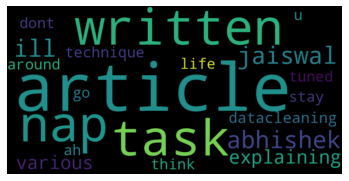

In [14]:
words = []
for message in df['lemmatizer']:
    words.extend([word for word in message if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()